In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.tokenize import word_tokenize
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("sentiment_train.csv")

In [3]:
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64


So from the above we can see that the data is slight imbalanced but workable, and we don't have any null values.

And from the dataset we can observe that the their is no relation between ID, device_used or browser_used and reviews, affecting the outcome, so removed all unnecessary variables.

In [6]:
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [7]:
df['Is_Response'].replace({'not happy':0,'happy':1},inplace=True)

In [8]:

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(b.isdigit() for b in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)
df["Description"] = df["Description"].apply(lambda x: clean_text(x))

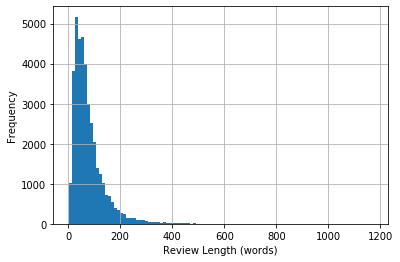

In [9]:
words_per_desc = df.Description.apply(lambda x: len(x.split(" ")))
words_per_desc.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [10]:
print('Average words:', words_per_desc.mean())
print('Skewness:',words_per_desc.skew())

Average words: 77.56745094010068
Skewness: 2.888649946621097


We can see that the average words per descriptions is 77 with postive skewness of 2.88

In [11]:
pcr_val = 100 * df['Is_Response'].value_counts()/len(df)
pcr_val

1    68.12134
0    31.87866
Name: Is_Response, dtype: float64

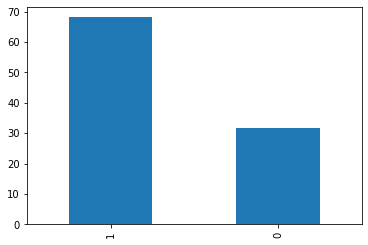

In [12]:
pcr_val.plot.bar()
plt.show()

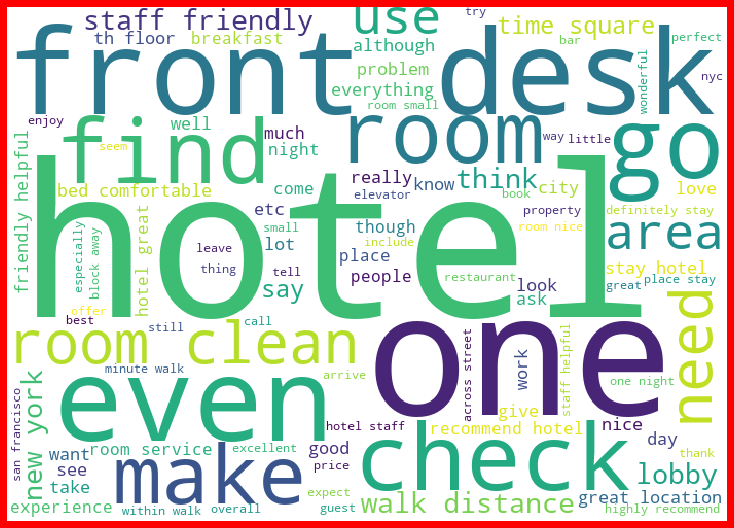

In [13]:
from wordcloud import WordCloud


happy = df['Description'][df['Is_Response']==1]

happy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(happy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

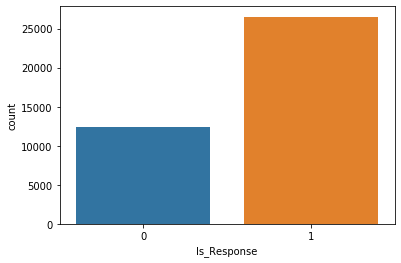

In [14]:
sns.countplot(df["Is_Response"])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(df['Description'])

X1 = features

y = df['Is_Response']
y=y.astype('int')

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,random_state=42)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [18]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [19]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7866022809000308


Cross_Val_Score =  0.7912771911798505


roc_auc_score =  0.7074765896222687


classification_report
               precision    recall  f1-score   support

           0       0.75      0.49      0.59      3096
           1       0.80      0.92      0.86      6637

    accuracy                           0.79      9733
   macro avg       0.77      0.71      0.72      9733
weighted avg       0.78      0.79      0.77      9733



[[1517 1579]
 [ 498 6139]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

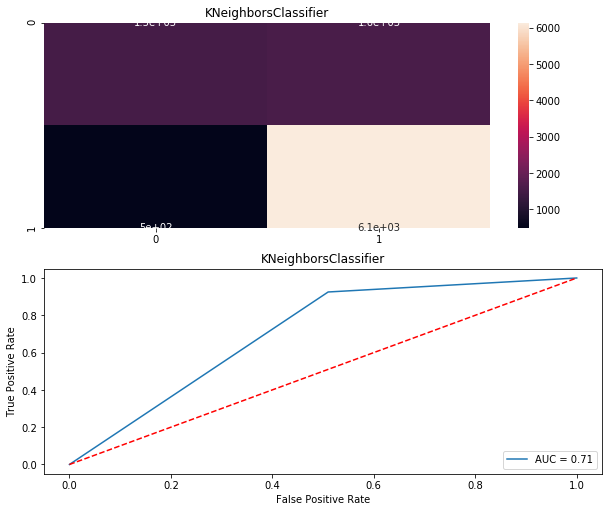

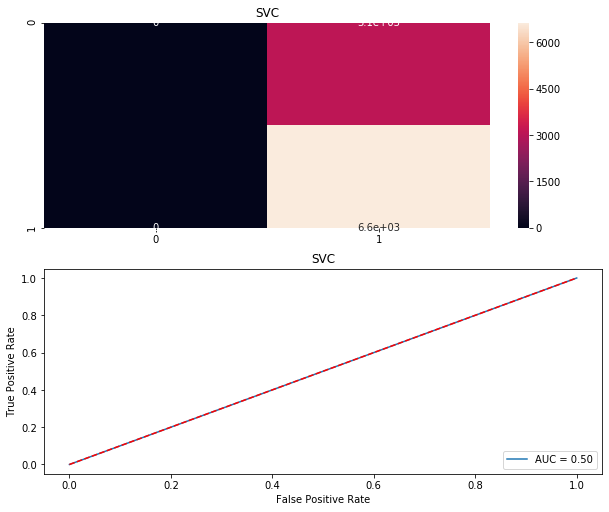

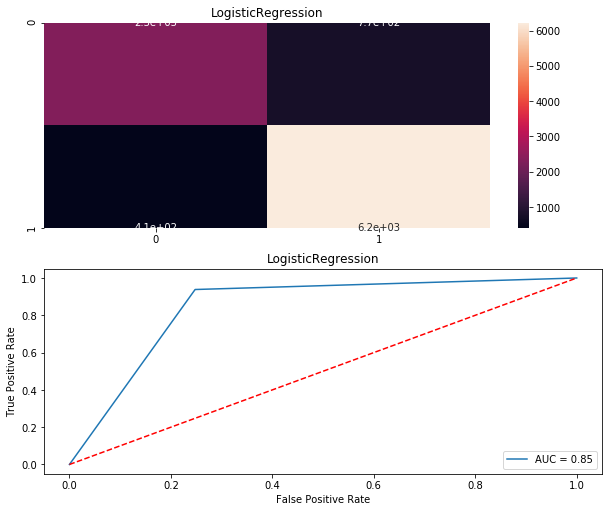

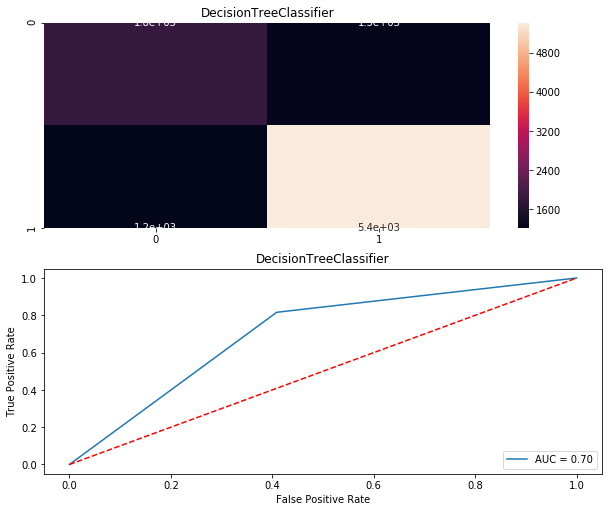

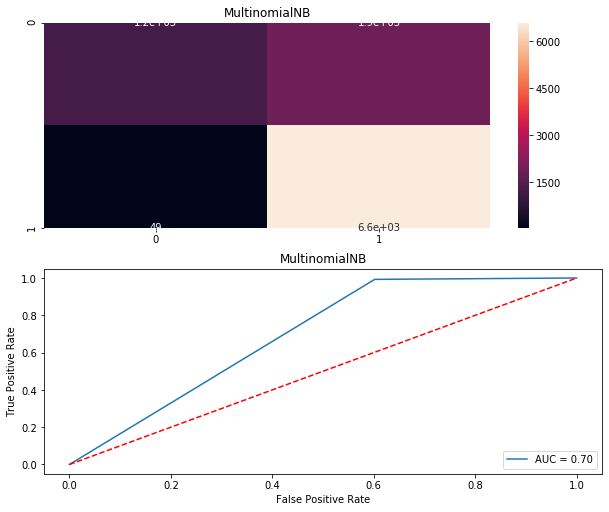

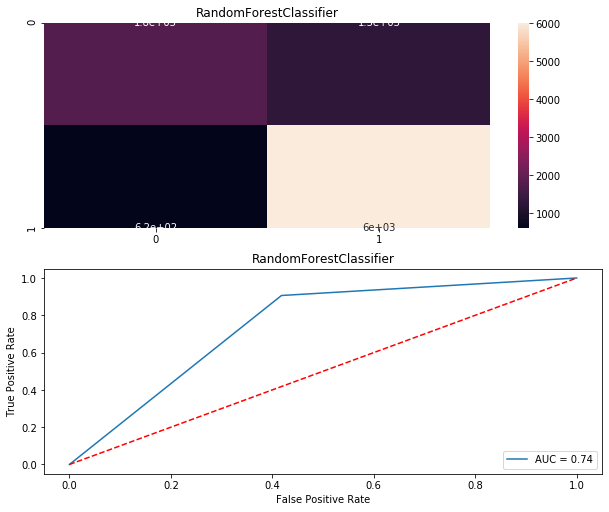

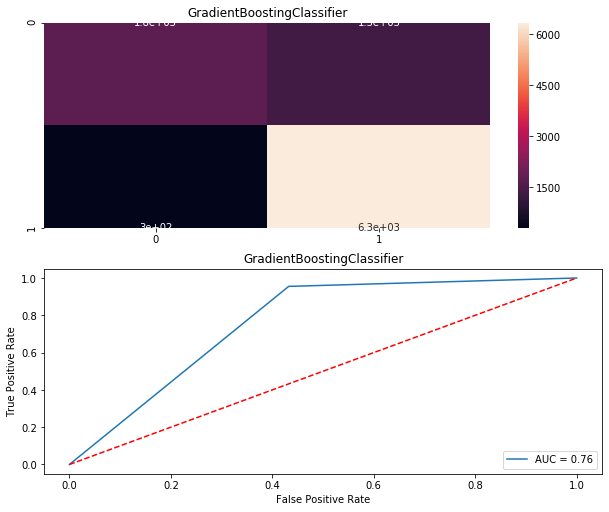

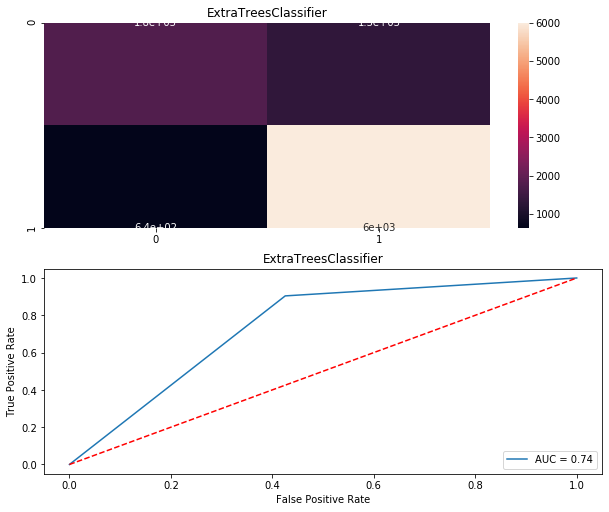

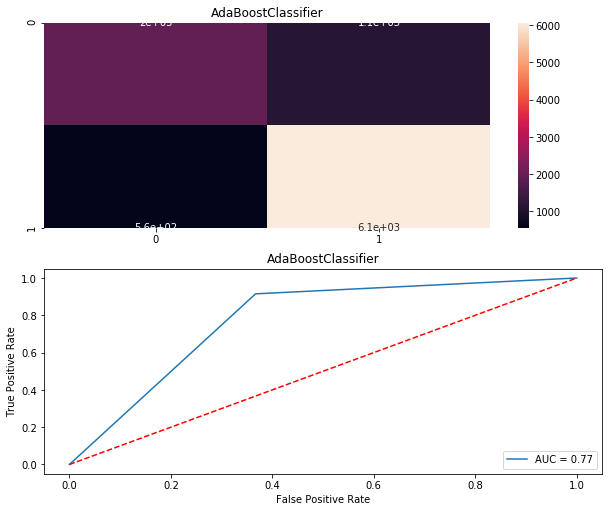

In [20]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X1, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [21]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,78.660228,79.127719,70.747659
1,SVC,68.190691,68.121340,50.000000
2,LogisticRegression,87.907120,88.238484,84.524304
3,DecisionTreeClassifier,74.458029,74.553051,70.371980
4,MultinomialNB,80.355492,81.346979,69.543648
5,RandomForestClassifier,80.304120,80.447956,74.408682
6,GradientBoostingClassifier,83.180931,83.111585,76.138949
7,ExtraTreesClassifier,79.923970,80.655999,73.931765
8,AdaBoostClassifier,82.533648,82.572217,77.404839


In [22]:
from sklearn.externals import joblib
joblib.dump(LR, 'Hotel_Sentiment1.obj')

['Hotel_Sentiment1.obj']

In [23]:
model=joblib.load('Hotel_Sentiment1.obj')

In [24]:
df1 = pd.read_csv('Sentiment_test.csv')
df1

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile
...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop


In [25]:
df1.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [26]:
df1["Description"] = df1["Description"].apply(lambda x: clean_text(x))

In [27]:
test_features = tf_vec.transform(df1['Description'])
x2 = test_features

In [28]:
prediction=model.predict(x2)
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Hotel_Sentiment_Prediction_results.csv")